# Цель лабораторной работы

Изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей

# Задание

1. Выбрать набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделить выборку на обучающую и тестовую.
3. Обучить модель k-ближайших соседей для произвольно заданного гиперпараметра K. Оценить качество модели с помощью подходящих для задачи метрик.
4. Построить модель и оценить качество модели с использованием кросс-валидации.
5. Произвести подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

# Ход выполнения лабораторной работы

Подключим необходимые библиотеки и загрузим набор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

# Устанавливаем тип графиков
sns.set(style="ticks")

# Для лучшего качествоа графиков
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Устанавливаем ширину экрана для отчета
pd.set_option("display.width", 70)

# Загружаем данные
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.shape

(303, 14)

In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Как видим, пустых значений нет, значет нет необходимости преобразовывать набор данных

Разделим данные на целевой столбец и признаки

In [6]:
X = data.drop("target", axis=1)
Y = data["target"]
print(X, "\n")
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1   3       145   233    1        0      150      0   
1     37    1   2       130   250    0        1      187      0   
2     41    0   1       130   204    0        0      172      0   
3     56    1   1       120   236    0        1      178      0   
4     57    0   0       120   354    0        1      163      1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...   
298   57    0   0       140   241    0        1      123      1   
299   45    1   3       110   264    0        1      132      0   
300   68    1   0       144   193    1        1      141      0   
301   57    1   0       130   131    0        1      115      1   
302   57    0   1       130   236    0        0      174      0   

     oldpeak  slope  ca  thal  
0        2.3      0   0     1  
1        3.5      0   0     2  
2        1.4      2   0     2  
3        0.8      2   0     2  
4        0.6      2   0     2  
.. 

In [7]:
X.shape

(303, 13)

In [8]:
Y.shape

(303,)

#### С использованием метода train_test_split разделим выборку на обучающую и тестовую

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [10]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (227, 13)
X_test: (76, 13)
Y_train: (227,)
Y_test: (76,)


#### Обучим модель k-ближайших соседей для произвольно заданного гиперпараметра K

In [11]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 70 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(X_train, Y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(Y_train, target1_0), accuracy_score(Y_test, target1_1)

(0.6475770925110133, 0.5789473684210527)

#### Построим модель и оценим качество модели с использованием кросс-валидации

In [12]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), X, Y, cv=3)

In [13]:
# Значение метрики accuracy для 3 фолдов
scores

array([0.6039604 , 0.53465347, 0.61386139])

In [14]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.5841584158415842

#### Произведем подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [15]:
# Список настраиваемых параметров
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [16]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', return_train_score=True)
clf_gs.fit(X, Y)
clf_gs.best_params_

CPU times: user 2.69 s, sys: 2.37 ms, total: 2.69 s
Wall time: 2.69 s


{'n_neighbors': 37}

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

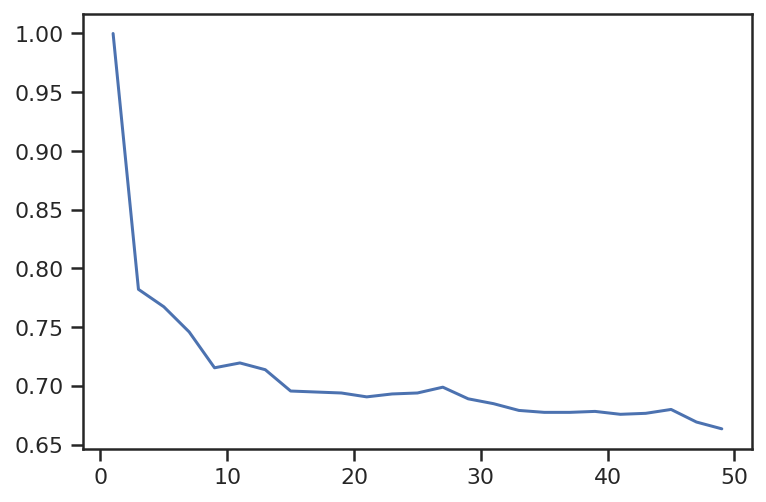

In [17]:
plt.plot(n_range, clf_gs.cv_results_["mean_train_score"]);

Очевидно, что для $K=1$ на тренировочном наборе данных мы находим ровно ту же точку, что и нужно предсказать, и чем больше её соседей мы берём — тем меньше точность.

Посмотрим на тестовом наборе данных

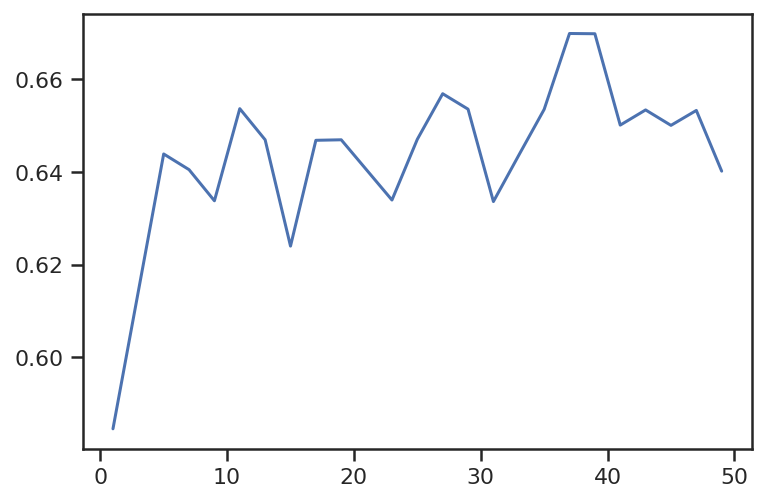

In [18]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

Проверим получившуюся модель:

In [19]:
cl1_2 = KNeighborsClassifier(**clf_gs.best_params_)
cl1_2.fit(X_train, Y_train)
target2_0 = cl1_2.predict(X_train)
target2_1 = cl1_2.predict(X_test)
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

(0.6740088105726872, 0.5921052631578947)

Как видим, точность модели улучшилось